In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project/Python_Project_4/MutualFunds.csv")
print(df.head())
print(df.info())
print(df.columns)

  fund_symbol  quote_type region                  fund_short_name  \
0       AAAAX  MutualFund     US  DWS RREEF Real Assets Fund - Cl   
1       AAAEX  MutualFund     US  AllianzGI Health Sciences Fund    
2       AAAFX  MutualFund     US                              NaN   
3       AAAGX  MutualFund     US  Thrivent Large Cap Growth Fund    
4       AAAHX  MutualFund     US                              NaN   

                                      fund_long_name currency  \
0               DWS RREEF Real Assets Fund - Class A      USD   
1      Virtus AllianzGI Health Sciences Fund Class P      USD   
2  American Century One Choice Blend+ 2015 Portfo...      USD   
3             Thrivent Large Cap Growth Fund Class A      USD   
4  American Century One Choice Blend+ 2015 Portfo...      USD   

   initial_investment  subsequent_investment     fund_category  \
0              1000.0                   50.0  World Allocation   
1           1000000.0                    NaN            Health

In [2]:
# Select only ESG-related columns + key identifiers
esg_cols = ['fund_symbol', 'fund_category', 'fund_family', 
            'environment_score', 'social_score', 'governance_score']

esg_df = df[esg_cols].copy()

# Convert scores to numeric (in case of strings)
for col in ['environment_score', 'social_score', 'governance_score']:
    esg_df[col] = pd.to_numeric(esg_df[col], errors='coerce')

# Check missing values
print(esg_df.isnull().sum())

# Drop rows with missing ESG scores
esg_df = esg_df.dropna(subset=['environment_score', 'social_score', 'governance_score'])

print(esg_df.head())


fund_symbol             0
fund_category         663
fund_family             0
environment_score    8395
social_score         8395
governance_score     8395
dtype: int64
   fund_symbol                  fund_category                   fund_family  \
0        AAAAX               World Allocation                           DWS   
1        AAAEX                         Health                        Virtus   
3        AAAGX                   Large Growth                Thrivent Funds   
5        AAAIX  Allocation--70% to 85% Equity  American Century Investments   
10       AAANX            Tactical Allocation           Horizon Investments   

    environment_score  social_score  governance_score  
0                8.42          7.43              5.43  
1                1.42         12.96              8.40  
3                2.04         10.13              8.03  
5                4.00          9.01              6.82  
10               4.13          8.68              6.95  


      fund_symbol              fund_category        fund_family  \
19268       RSNRX          Natural Resources  AllianceBernstein   
19269       RSNYX          Natural Resources                AAM   
19267       RSNKX          Natural Resources     Appleseed Fund   
18772       RGNCX          Natural Resources     Arbitrage Fund   
4914        ENPSX  Trading--Leveraged Equity           ProFunds   
4913        ENPIX  Trading--Leveraged Equity           ProFunds   
9755        IENSX              Equity Energy            Ashmore   
9753        IENIX              Equity Energy                MFS   
7197        FSTEX              Equity Energy    American Beacon   
9756        IENYX              Equity Energy        Eaton Vance   

       environment_score  social_score  governance_score  overall_esg  
19268              17.92         10.97              8.45    12.446667  
19269              17.92         10.97              8.45    12.446667  
19267              17.92         10.97        

C:\Users\Admin1\AppData\Local\Temp\ipykernel_6064\2296396737.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_esg, x='overall_esg', y='fund_symbol', palette='viridis')


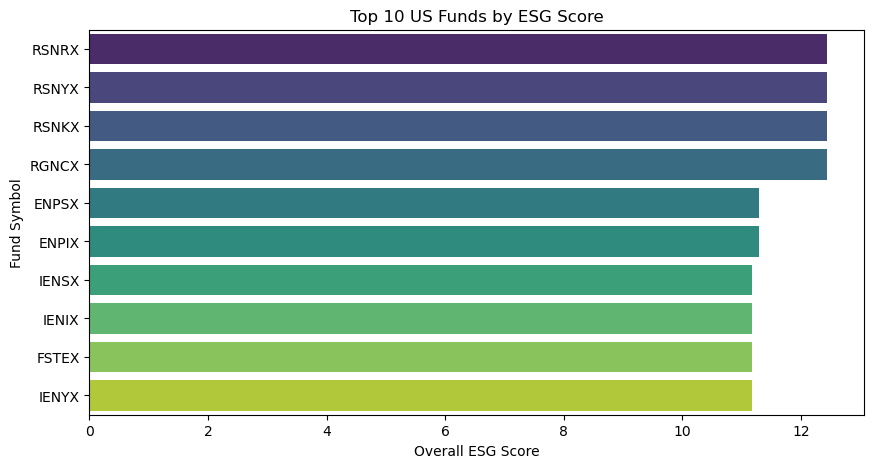

                   fund_category  environment_score  social_score  \
0  Allocation--15% to 30% Equity           4.635600      9.458800   
1  Allocation--30% to 50% Equity           4.190524      9.423560   
2  Allocation--50% to 70% Equity           4.051275      9.923725   
3  Allocation--70% to 85% Equity           4.053321      9.367040   
4        Allocation--85%+ Equity           3.853310      9.077793   

   governance_score  
0          7.031200  
1          6.832199  
2          7.338977  
3          7.089025  
4          6.992207  


<Figure size 1200x600 with 0 Axes>

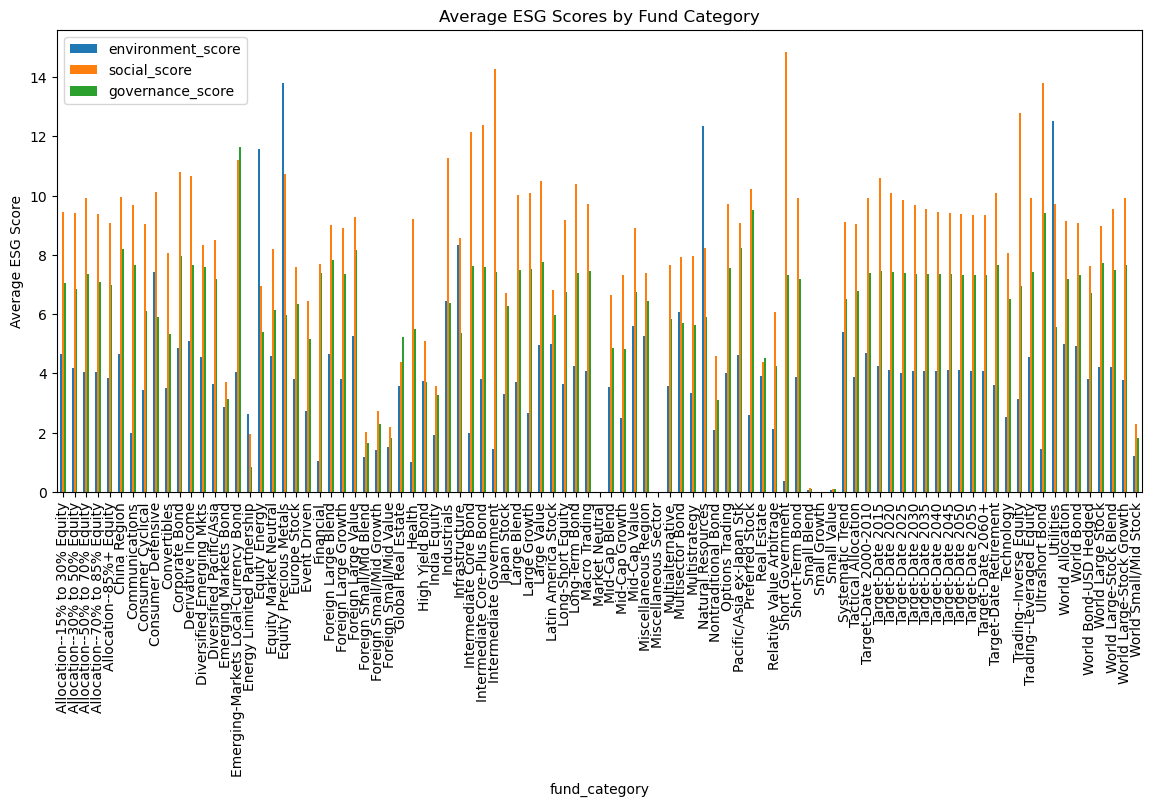

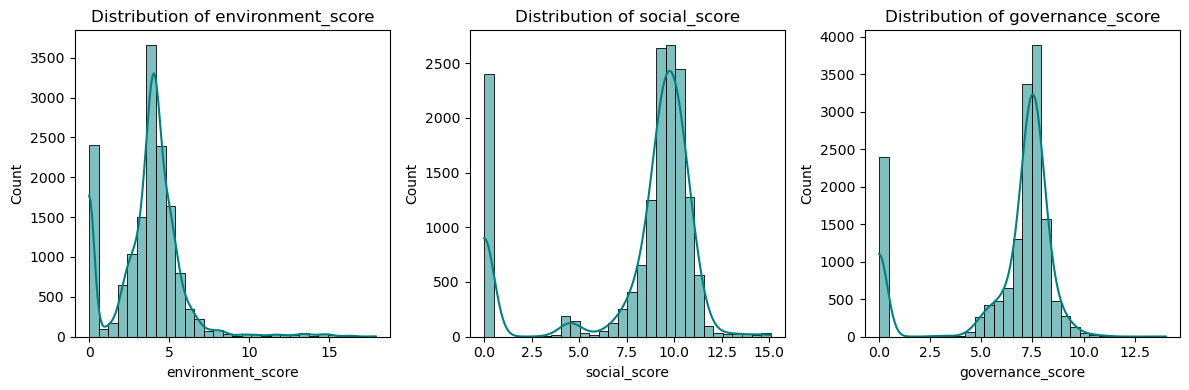

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create an overall ESG score
esg_df['overall_esg'] = esg_df[['environment_score','social_score','governance_score']].mean(axis=1)

# Top 10 funds by ESG
top10_esg = esg_df.sort_values('overall_esg', ascending=False).head(10)
print(top10_esg)

# Plot Top 10 funds
plt.figure(figsize=(10,5))
sns.barplot(data=top10_esg, x='overall_esg', y='fund_symbol', palette='viridis')
plt.title("Top 10 US Funds by ESG Score")
plt.xlabel("Overall ESG Score")
plt.ylabel("Fund Symbol")
plt.show()

# 2. Average ESG by category
avg_category = esg_df.groupby('fund_category')[['environment_score','social_score','governance_score']].mean().reset_index()
print(avg_category.head())

# Plot category ESG scores
plt.figure(figsize=(12,6))
avg_category.set_index('fund_category').plot(kind='bar', figsize=(14,6))
plt.title("Average ESG Scores by Fund Category")
plt.ylabel("Average ESG Score")
plt.show()

# 3. Distribution of individual ESG scores
plt.figure(figsize=(12,4))
for i, col in enumerate(['environment_score','social_score','governance_score']):
    plt.subplot(1,3,i+1)
    sns.histplot(esg_df[col], bins=30, kde=True, color='teal')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [4]:
# Save cleaned MutualFunds dataset
df.to_csv("mutualfunds_clean.csv", index=False)
print("Cleaned dataset saved as mutualfunds_clean.csv")

Cleaned dataset saved as mutualfunds_clean.csv
